## Final Project

Investigate global temperatures

### Read Data 

In [68]:

setwd('D:/OneDrive - Montana State University - Bozeman/DataSci/Training/Coursera_BayesianStats2_UCSC/FinalProject/Code')
isfar<-load("../Data/fig01.RData") 

samplesize=365*30 # corresponds to original sample size



In [74]:
xhist = NCEP1.hist.early_GLaw
bins=with(xhist,sample(length(mids),samplesize,p=density,replace=TRUE)) # choose a bin
Tsamples.early.Glob=runif(length(bins),xhist$breaks[bins],xhist$breaks[bins+1]) # sample a uniform in it

xhist = NCEP1.hist.late_GLaw
bins=with(xhist,sample(length(mids),samplesize,p=density,replace=TRUE)) # choose a bin
Tsamples.today.Glob=runif(length(bins),xhist$breaks[bins],xhist$breaks[bins+1]) # sample a uniform in it

xhist = NCEP1.hist.early_LOCaw
bins=with(xhist,sample(length(mids),samplesize,p=density,replace=TRUE)) # choose a bin
Tsamples.early.Loc=runif(length(bins),xhist$breaks[bins],xhist$breaks[bins+1]) # sample a uniform in it

xhist = NCEP1.hist.late_LOCaw
bins=with(xhist,sample(length(mids),samplesize,p=density,replace=TRUE)) # choose a bin
Tsamples.today.Loc=runif(length(bins),xhist$breaks[bins],xhist$breaks[bins+1]) # sample a uniform in it

(summary(Tsamples.early.Glob))
(summary(Tsamples.today.Glob))
(summary(Tsamples.early.Loc))
(summary(Tsamples.today.Loc))

mean.early.Glob <- mean(Tsamples.early.Glob)
mean.today.Glob <- mean(Tsamples.today.Glob)

mean.early.Loc <- mean(Tsamples.early.Loc)
mean.today.Loc <- mean(Tsamples.today.Loc)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.0000 -0.4262 -0.2755 -0.2736 -0.1274  0.5000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.7000  0.2483  0.3940  0.3930  0.5473  1.2000 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-14.9999  -0.9521  -0.1926  -0.2387   0.5852  15.0689 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-14.9995  -0.4752   0.3240   0.3778   1.1362  15.0695 

In [3]:
temps <- c(Tsamples.early.Glob,Tsamples.today.Glob,Tsamples.early.Loc,Tsamples.today.Loc)
group <-c(replicate(samplesize, 1), replicate(samplesize, 2), replicate(samplesize, 3), replicate(samplesize, 4))
Data <-data.frame(temps, group)

## Plotting of initial data
**Note the following plots are (slightly) adapted from Figure 1 in Sippel et al. (2019, Nature Climate Change) and code can be found here:**
https://data.iac.ethz.ch/Sippel_et_al_2019_DailyDetection/figures/_fig01/_fig01.R

We show below, histograms of daily average temperature (2m above ground) anomaly for the periods between 1951-1980 (early) and 2009-2018 (today). The anomaly is calculated based on the 1979–2005 climate period. 30 year climate periods are commonly used to compare climate data, while minimizing impacts of weather. 

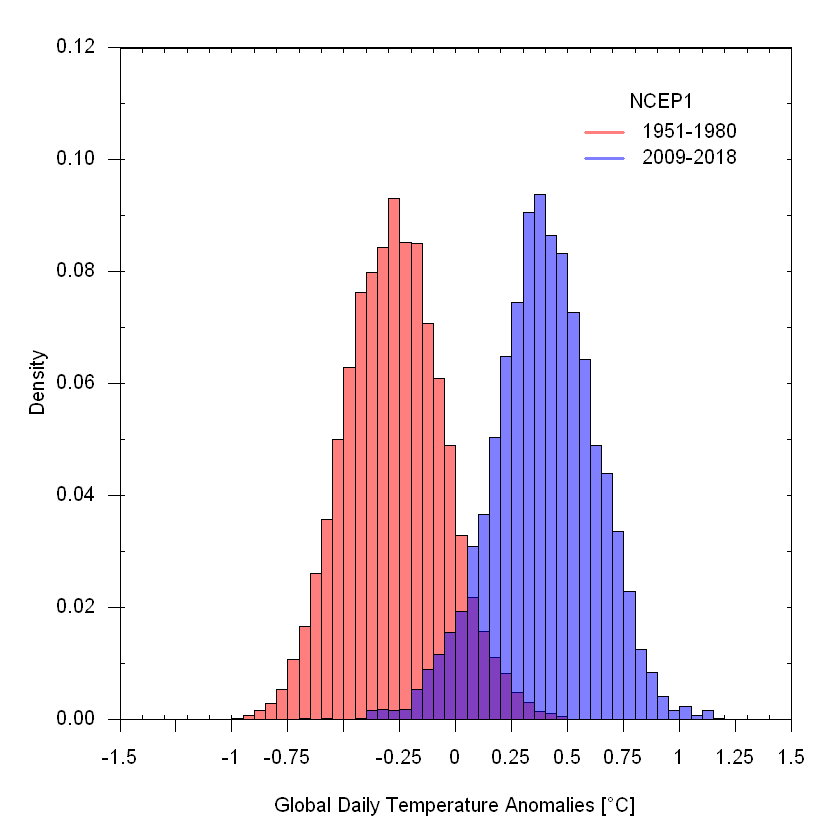

In [4]:
  # Global Daily temperature anomalies:
  ylim_global = c(0, 0.12)
  xlim_global = c(0, 60)
  bin_width = 0.05
  
  #pdf(file = "01_NCEP1_hist_day_GLaw.pdf", width = 7, height = 6)
  par(mar=c(5,5,2,2))
  
  p<-plot(c(1,1), type="n", xlim = xlim_global, ylim = ylim_global, xaxs = "i", yaxs = "i", las = 1, xaxt="n", yaxt="n",
       xlab = "Global Daily Temperature Anomalies [°C]", ylab = "Density")
  axis(side = 2, las=2)
  axis(side = 1, at = seq(0, 60, 5), labels = seq(-1.5, 1.5, length.out = 13))
  # grid(nx=30, ny=12)
  
  barplot(height = NCEP1.hist.early_GLaw$density, width = 1, space=0, 
          lwd = 2, # xlim = c(-15, 15), ylim = c(0, 0.2),
        col=rgb(1,0,0,0.5), #col = make.transparent.color(col.paired[2], alpha = 40), border = col.paired[2],
          main = "", ylab = "", xaxs = "i", yaxs = "i", las = 1, yaxt="n", add=T)
  
  barplot(height = NCEP1.hist.late_GLaw$density, width = 1, space=0, 
          lwd = 2, xlim = c(-15, 15), ylim = c(0, 0.2),
          col=rgb(0,0,1,0.5), # = make.transparent.color(col.paired[8], alpha = 40), border = col.paired[8],
          main = "", ylab = "", xaxs = "i", yaxs = "i", las = 1, yaxt="n", add = T)
  
  axis(side = 1, las=2, at = seq(0, 60, 2), labels = F, tcl = 0.2)
  axis(side = 2, las=2, at = seq(0, ylim_global[2], 0.01), labels = F, tcl = 0.2)
  axis(side = 3, las=2, at = seq(0, 60, 2), labels = F, tcl = 0.2)
  axis(side = 4, las=2, at = seq(0, ylim_global[2], 0.01), labels = F, tcl = 0.2)
  
  legend("topright", c("1951-1980", "2009-2018"), col = c(rgb(1,0,0,0.5), rgb(0,0,1,0.5)), lty = 1, lwd = 3, cex=1, bg="white", inset = .05, title="NCEP1", bty="n")
  #dev.off()



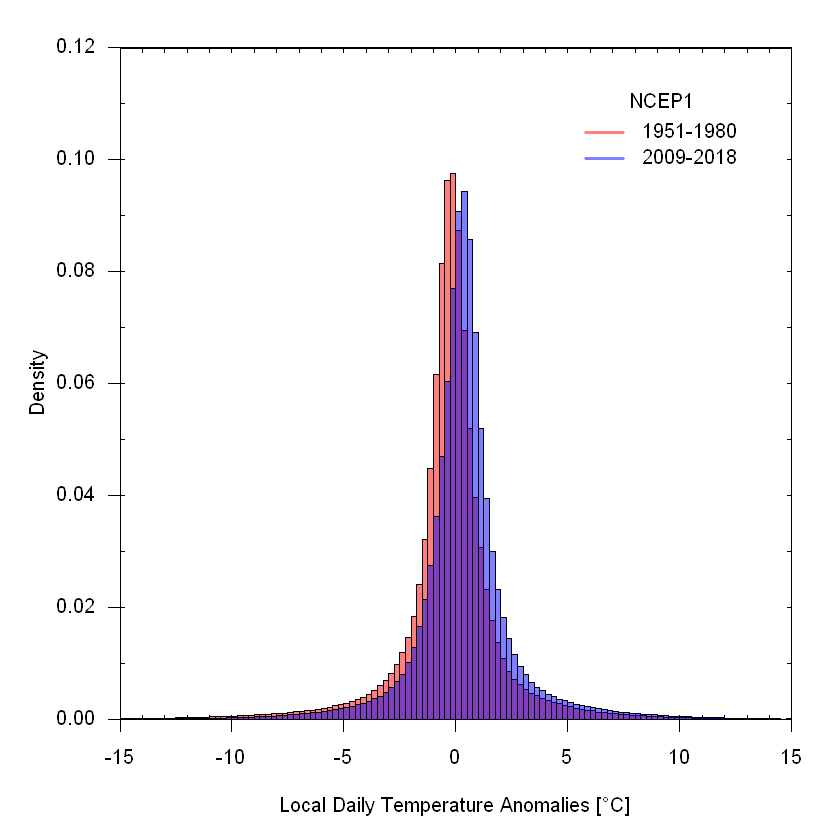

In [5]:
  ylim_local = c(0, 0.12)
  xlim_local = c(0, 30)
  bin_width=0.25
  
  # NCEP1 - Histogram:
  #pdf(file = "01_NCEP1_hist_day_LOCaw.pdf", width = 7, height = 6)
  par(mar=c(5,5,2,2))
  plot(c(1,1), type="n", xlim = xlim_local, ylim = ylim_local, xaxs = "i", yaxs = "i", las = 1, xaxt="n", yaxt="n",
       xlab = "Local Daily Temperature Anomalies [°C]", ylab = "Density")
  axis(side = 2, las=2)
  axis(side = 1, at = seq(0, 30, 5), labels = seq(-15, 15, 5))
  # grid(nx=30, ny=12)
  
  barplot(height = NCEP1.hist.early_LOCaw$density, width = bin_width, space=0, 
          lwd = 2, col=rgb(1,0,0,0.5), # col = make.transparent.color(col.paired[2], alpha = 40), border = col.paired[2],
          main = "", ylab = "", xaxs = "i", yaxs = "i", las = 1, yaxt="n", add=T)
  
  barplot(height = NCEP1.hist.late_LOCaw$density, width = bin_width, space=0, 
          lwd = 2, col=rgb(0,0,1,0.5), #col = make.transparent.color(col.paired[8], alpha = 40), border = col.paired[8],
          main = "", ylab = "", xaxs = "i", yaxs = "i", las = 1, yaxt="n", add = T)
  
  axis(side = 1, las=2, at = seq(0, 30, 1), labels = F, tcl = 0.2)
  axis(side = 2, las=2, at = seq(0, ylim_local[2], 0.01), labels = F, tcl = 0.2)
  axis(side = 3, las=2, at = seq(0, 30, 1), labels = F, tcl = 0.2)
  axis(side = 4, las=2, at = seq(0, ylim_local[2], 0.01), labels = F, tcl = 0.2)
  
  legend("topright", c("1951-1980", "2009-2018"), col = c(rgb(1,0,0,0.5), rgb(0,0,1,0.5)), lty = 1, lwd = 3, cex=1, bg="white", inset = .05, title="NCEP1", bty="n")


In [6]:
#install.packages("rjags")
library("rjags")


Warning message:
"package 'rjags' was built under R version 3.6.3"
Loading required package: coda

Warning message:
"package 'coda' was built under R version 3.6.3"
Linked to JAGS 4.2.0

Loaded modules: basemod,bugs



In [7]:
mod_string = " model {
    for (i in 1:length(y)) {
        y[i] ~ dnorm(mu[grp[i]], prec[grp[i]])
    }
    
    for (j in 1:4) {
        mu[j] ~ dnorm(0.0, 1.0/1.0e6)
        prec[j] ~ dgamma(5/2.0, 5*1.0/2.0)
        sig[j] = sqrt( 1.0 / prec[j] )
    }
} "
set.seed(82)

data_jags = list(y=Data$temps, 
                 grp=as.numeric(Data$group))

params = c("mu", "sig")

inits = function() {
  inits = list("mu"=rnorm(4,0.0,100.0), "prec"=rgamma(4,1.0,1.0))
}

mod = jags.model(textConnection(mod_string), data=data_jags, inits=inits, n.chains=3)
update(mod, 1e3)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 40
   Unobserved stochastic nodes: 8
   Total graph size: 139

Initializing model



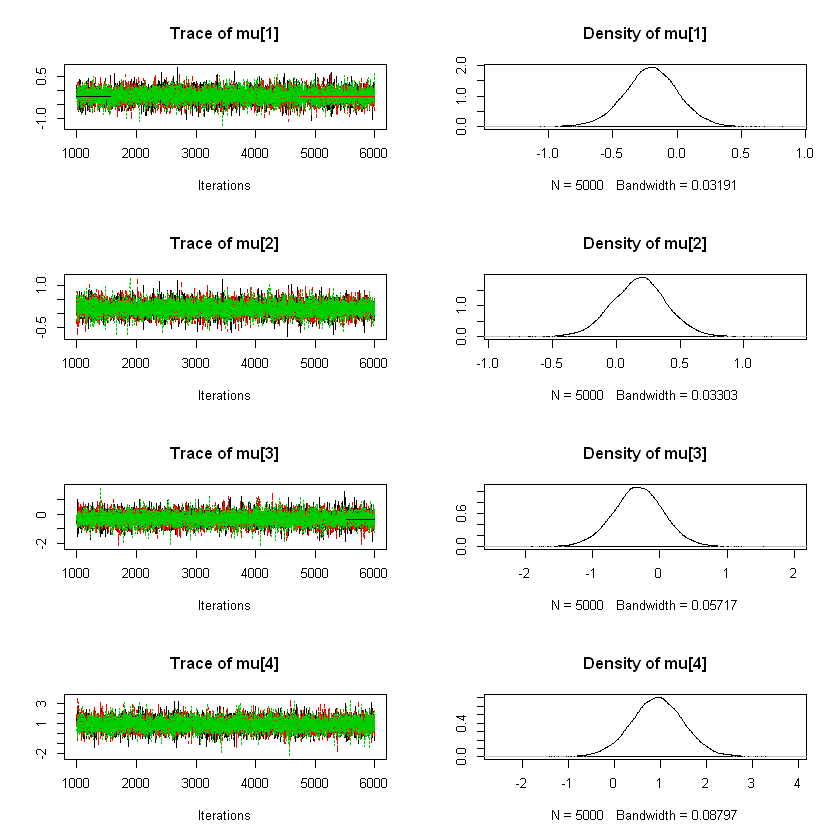

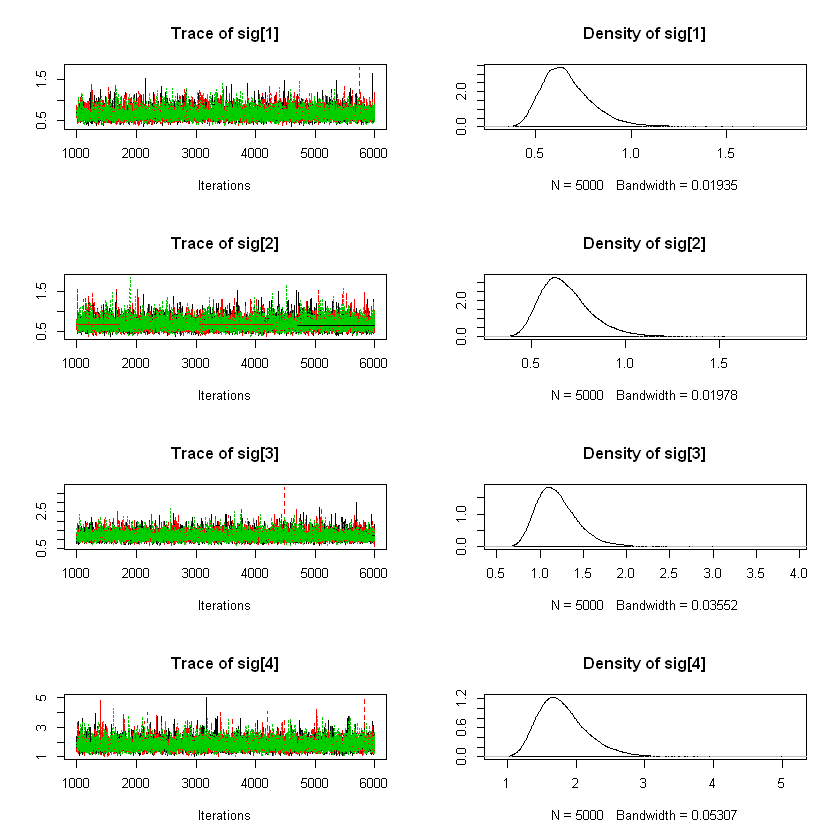

In [8]:
mod_sim = coda.samples(model=mod,
                       variable.names=params,
                       n.iter=5e3)
mod_csim = as.mcmc(do.call(rbind, mod_sim)) # combined chains

plot(mod_sim)

In [9]:
(gelman.diag(mod_sim))
(autocorr.diag(mod_sim))
(effectiveSize(mod_sim))

Potential scale reduction factors:

       Point est. Upper C.I.
mu[1]           1          1
mu[2]           1          1
mu[3]           1          1
mu[4]           1          1
sig[1]          1          1
sig[2]          1          1
sig[3]          1          1
sig[4]          1          1

Multivariate psrf

1

,mu[1],mu[2],mu[3],mu[4],sig[1],sig[2],sig[3],sig[4]
Lag 0,1.000000000,1.0000000000,1.000000000,1.000000000,1.0000000000,1.000000000,1.000000000,1.0000000000
Lag 1,-0.007769320,-0.0113770256,0.002891897,-0.014608253,0.0736012008,0.072550676,0.070822280,0.0766990882
Lag 5,0.010722469,0.0006533352,0.004308345,-0.002988417,-0.0008344826,-0.004668230,-0.006727785,-0.0082862896
Lag 10,0.004532401,0.0151531448,0.003937495,0.003215050,-0.0015008816,-0.009579502,0.003351668,0.0090991262
Lag 50,-0.001033908,-0.0012280939,0.004988243,-0.004102543,0.0001153598,0.006329279,-0.002332619,-0.0004674107


mu[1]    mu[2]    mu[3]    mu[4]   sig[1]   sig[2]   sig[3]   sig[4] 
15205.20 15618.71 14380.27 15994.26 12545.17 12968.12 13305.96 13235.12

In [10]:
(pm_params = colMeans(mod_csim))

mu[1]      mu[2]      mu[3]      mu[4]     sig[1]     sig[2]     sig[3] 
-0.1999938  0.1820285 -0.3197214  0.9457415  0.6662342  0.6861594  1.2043742 
    sig[4] 
 1.8137994

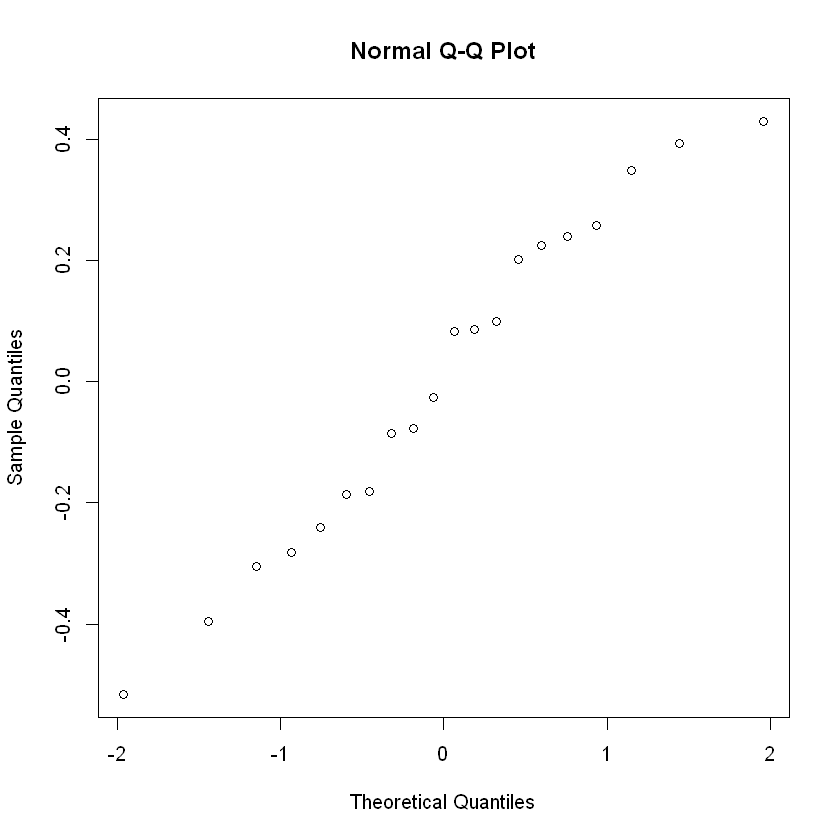

In [11]:
yhat = pm_params[1:2][data_jags$grp]
resid = data_jags$y - yhat
qqnorm(resid)


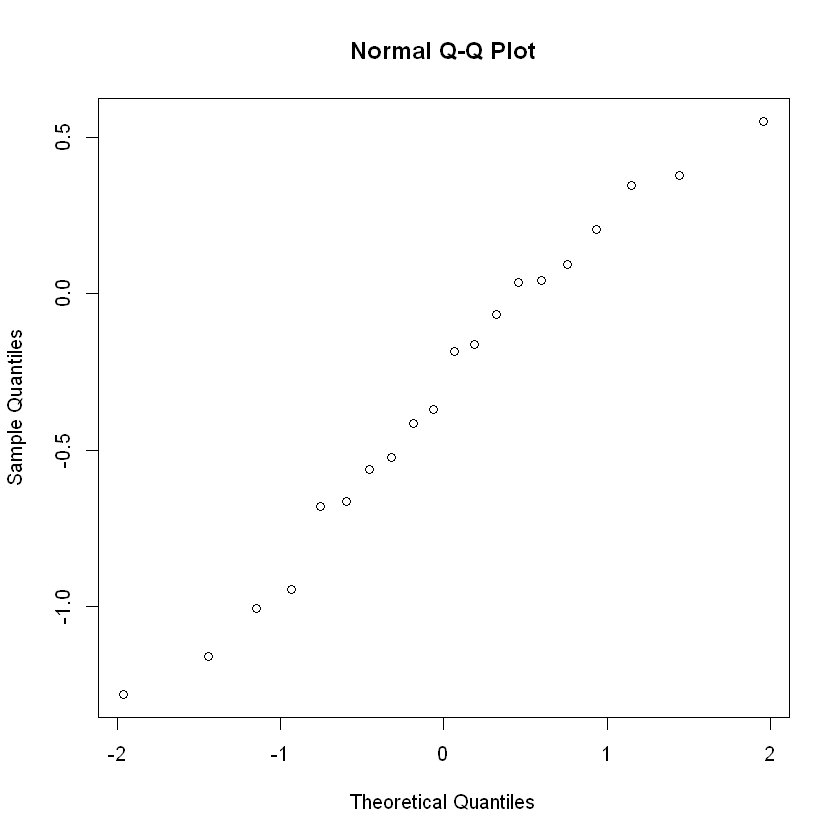

In [12]:
yhat = pm_params[3:4][data_jags$grp]
resid = data_jags$y - yhat
qqnorm(resid)


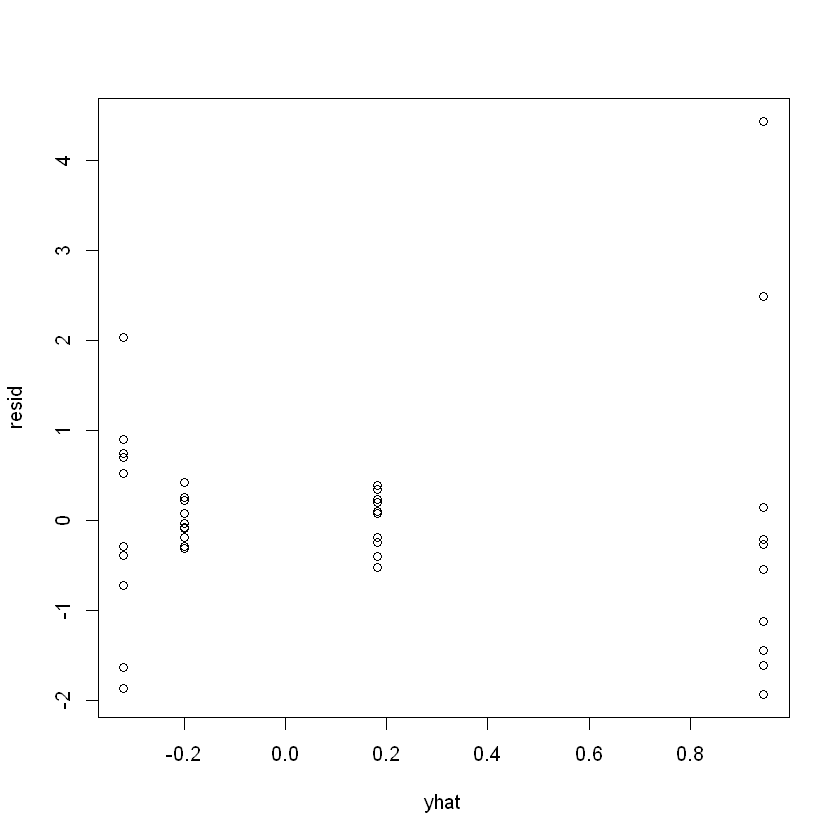

In [13]:
yhat = pm_params[1:4][data_jags$grp]
resid = data_jags$y - yhat
plot(yhat, resid)

In [14]:
summary(mod_sim)
HPDinterval(mod_csim)


Iterations = 1001:6000
Thinning interval = 1 
Number of chains = 3 
Sample size per chain = 5000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean     SD Naive SE Time-series SE
mu[1]  -0.2000 0.2160 0.001763       0.001752
mu[2]   0.1820 0.2212 0.001806       0.001774
mu[3]  -0.3197 0.3878 0.003166       0.003239
mu[4]   0.9457 0.5862 0.004787       0.004645
sig[1]  0.6662 0.1358 0.001109       0.001212
sig[2]  0.6862 0.1417 0.001157       0.001244
sig[3]  1.2044 0.2473 0.002019       0.002145
sig[4]  1.8138 0.3763 0.003072       0.003276

2. Quantiles for each variable:

          2.5%      25%     50%      75%  97.5%
mu[1]  -0.6345 -0.33620 -0.1983 -0.06021 0.2272
mu[2]  -0.2529  0.03775  0.1851  0.32349 0.6160
mu[3]  -1.0963 -0.56415 -0.3171 -0.06960 0.4476
mu[4]  -0.2107  0.56631  0.9458  1.32723 2.0920
sig[1]  0.4630  0.57120  0.6455  0.73860 0.9897
sig[2]  0.4752  0.58775  0.6644  0.75883 1.0238
sig[3]  0.8300  1.0

,lower,upper
mu[1],-0.6212860,0.2381908
mu[2],-0.2488273,0.6195057
mu[3],-1.1182121,0.4195641
mu[4],-0.2265955,2.0707710
sig[1],0.4372787,0.9370886
sig[2],0.4546330,0.9736350
sig[3],0.7760496,1.6894919
sig[4],1.2028061,2.5784275


In [15]:
mean(mod_csim[,2] > mod_csim[,1])

[1] 0.8974

In [16]:
mean(mod_csim[,4] > mod_csim[,3])

[1] 0.9629333

In [94]:

rmax <-50
no_samples <- c(5, 10,50,100,200,300,400,500,600,700,800,900,1000, 5000, 10000)
ns <- length(no_samples)
       
SigLev_Gl  <- array(ns*rmax, dim=c(ns,rmax))
SigLev_Loc <-array(ns*rmax, dim=c(ns,rmax))
mu_all <-array(ns*rmax*4, dim=c(ns,rmax,4))


set.seed(11)

for (run in 1:rmax) {
    ct <-1
for (samples in no_samples ){

    xhist = NCEP1.hist.early_GLaw
    bins=with(xhist,sample(length(mids),samples,p=density,replace=TRUE)) # choose a bin
    Tsamples.early.Glob=runif(length(bins),xhist$breaks[bins],xhist$breaks[bins+1]) # sample a uniform in it

    xhist = NCEP1.hist.late_GLaw
    bins=with(xhist,sample(length(mids),samples,p=density,replace=TRUE)) # choose a bin
    Tsamples.today.Glob=runif(length(bins),xhist$breaks[bins],xhist$breaks[bins+1]) # sample a uniform in it

    xhist = NCEP1.hist.early_LOCaw
    bins=with(xhist,sample(length(mids),samples,p=density,replace=TRUE)) # choose a bin
    Tsamples.early.Loc=runif(length(bins),xhist$breaks[bins],xhist$breaks[bins+1]) # sample a uniform in it

    xhist = NCEP1.hist.late_LOCaw
    bins=with(xhist,sample(length(mids),samples,p=density,replace=TRUE)) # choose a bin
    Tsamples.today.Loc=runif(length(bins),xhist$breaks[bins],xhist$breaks[bins+1]) # sample a uniform in it

    temps <- c(Tsamples.early.Glob,Tsamples.today.Glob,Tsamples.early.Loc,Tsamples.today.Loc)
    group <-c(replicate(samples, 1), replicate(samples, 2), replicate(samples, 3), replicate(samples, 4))
    Data <-data.frame(temps, group)
    
    data_jags = list(y=Data$temps, 
                 grp=as.numeric(Data$group))
    
    mod = jags.model(textConnection(mod_string), data=data_jags, inits=inits, n.chains=3)
    update(mod, 1e3)
    
    
    mod_sim = coda.samples(model=mod,
                       variable.names=params,
                       n.iter=5e3)
    mod_csim = as.mcmc(do.call(rbind, mod_sim)) # combined chains
    
    SigLev_Gl[ct, run]  <- mean(mod_csim[,2] > mod_csim[,1])
    SigLev_Loc[ct, run] <- mean(mod_csim[,4] > mod_csim[,3])
    mu_all[ct,run,1:4]<- mod_csim[1,1:4]
    
    ct <- ct+1  
}
}

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 20
   Unobserved stochastic nodes: 8
   Total graph size: 99

Initializing model

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 40
   Unobserved stochastic nodes: 8
   Total graph size: 139

Initializing model

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 200
   Unobserved stochastic nodes: 8
   Total graph size: 459

Initializing model

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 400
   Unobserved stochastic nodes: 8
   Total graph size: 859

Initializing model

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 800
   Unobserved stochastic nodes: 8
   T

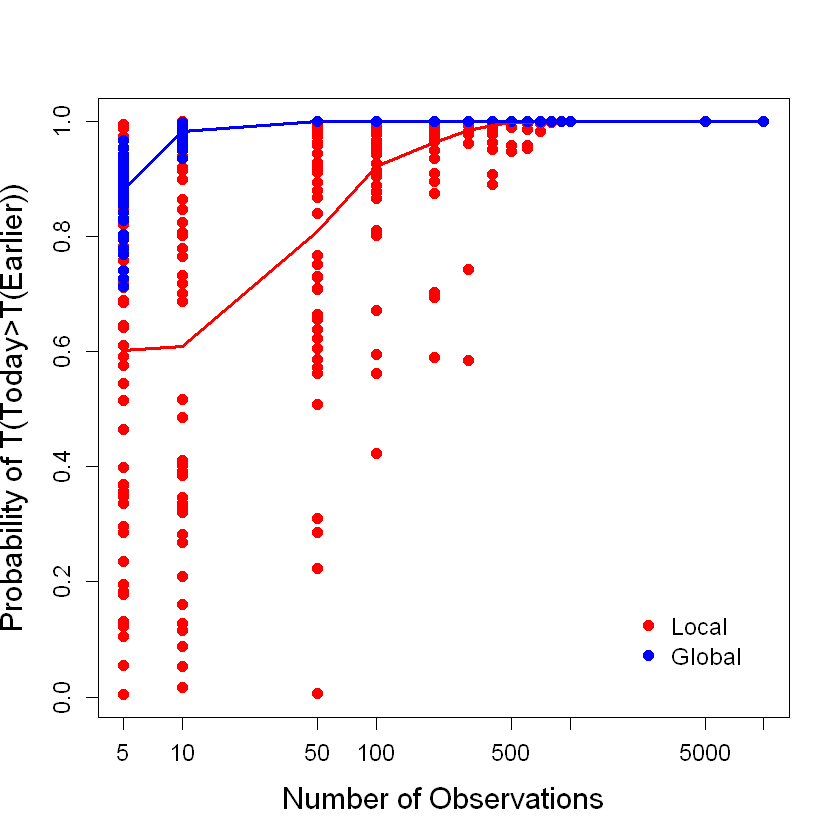

In [95]:
x <-rep(no_samples,times=rmax)

y <-SigLev_Loc
y2 <-SigLev_Gl
plot(x,y,col=rgb(1,0,0),  pch=19,log="x",ylab = "Probability of T(Today>T(Earlier))",xlab = "Number of Observations", 
     cex.axis=1.2,cex.lab=1.5, cex = 1.2)
points(x,y2,col=rgb(0,0,1), pch=19, cex = 1.2)
lines(no_samples,rowMeans(y),col=rgb(1,0,0), lwd=3)
lines(no_samples,rowMeans(y2),col=rgb(0,0,1), lwd=3)

legend("bottomright", c("Local", "Global"), col = c(rgb(1,0,0), rgb(0,0,1)), cex=1.2, bg="white", pch=19, inset = .05, bty="n")


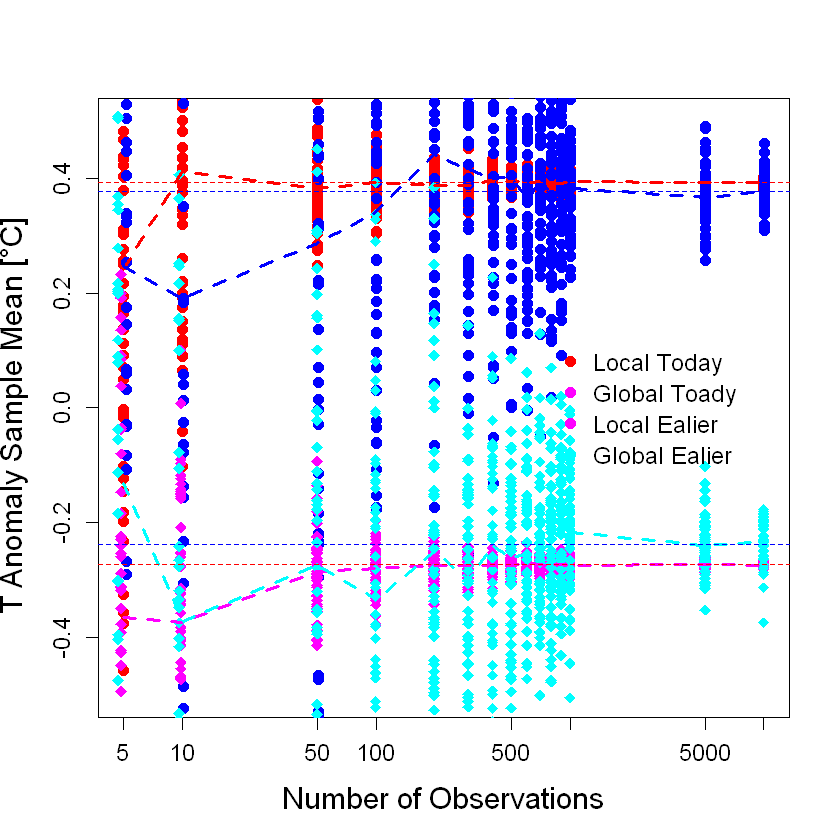

In [101]:
  ylim_local = c(-.5, .5)

x <-rep(no_samples,times=rmax)

y  <- mu_all[,,1]
y2 <- mu_all[,,3]
y3 <- mu_all[,,2]
y4 <- mu_all[,,4]

plot(x,y3,col=rgb(1,0,0),  pch=19,log="x",ylab = "T Anomaly Sample Mean [°C]  ",xlab = "Number of Observations", 
     cex.axis=1.2,cex.lab=1.5, cex = 1.2, ylim = ylim_local)
points(x+.15,y4,col=rgb(0,0,1), pch = 19, cex = 1.2 )

points(x-.15,y,col=rgb(1,0,1), pch = 18, cex = 1.3 )     
points(x-.3,y2,col=rgb(0,1,1), pch=18, cex = 1.3 )

lines(no_samples,rowMeans(y3),col=rgb(1,0,0), lwd=3,  lty = 2)
lines(no_samples,rowMeans(y4),col=rgb(0,0,1), lwd=3,  lty = 2)
lines(no_samples,rowMeans(y),col=rgb(1,0,1), lwd=3,  lty = 2)
lines(no_samples,rowMeans(y2),col=rgb(0,1,1), lwd=3,  lty = 2)

#lines(no_samples,rowMeans(y),col=rgb(1,0,0), lwd=3)
#lines(no_samples,rowMeans(y2),col=rgb(0,0,1), lwd=3)
abline(h=c(mean.early.Loc ,mean.today.Loc,mean.early.Glob,mean.today.Glob ), col=c("blue", "blue","red","red"), lty=c(2,2,2,2), lwd=c(1, 1,1,1))

legend("right", c("Local Today", "Global Toady","Local Ealier", "Global Ealier"), col = c(rgb(1,0,0),rgb(1,0,1),rgb(1,0,1), rgb(0,1,1)), cex=1.2, bg="white", pch=19, inset = .05, bty="n")
